In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

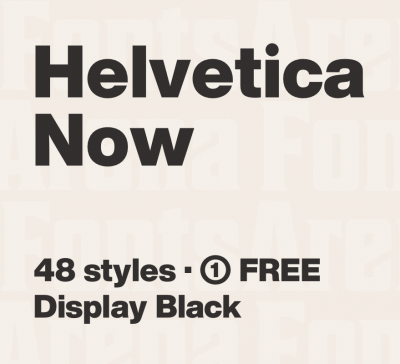

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

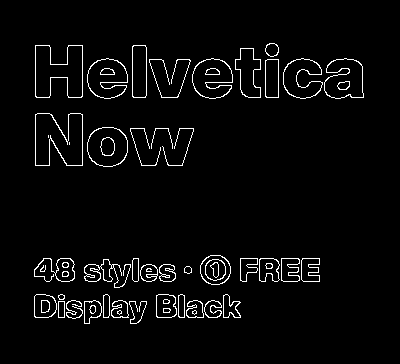

In [5]:
cv2_imshow(edges)

### Vertical Edge Detector
<b> Matrix:</b>

| 0  | 1 | 2 |
|----|---|---|
| -1 | 0 | 1 |
| -1 | 0 | 1 |
| -1 | 0 | 1 |


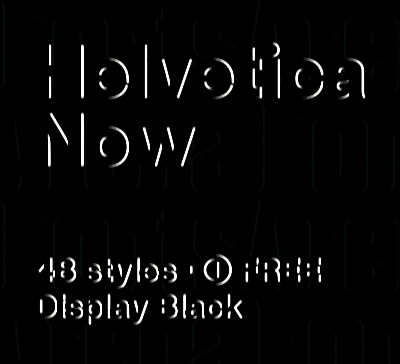

In [56]:

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
# kernel = np.float32([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Horizontal Edge Detector
<b> Matrix:</b>

| 0  | 1  | 2  |
|----|----|----|
| -1 | -1 | -1 |
| 0  | 0  | 0  |
| 1  | 1  | 1  |

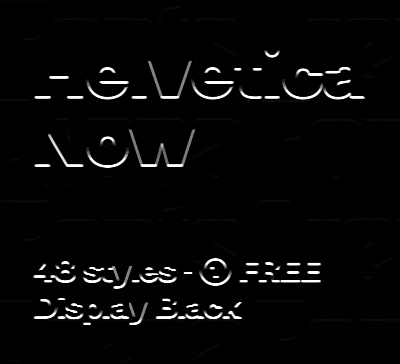

In [7]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Diagonal Edge Detector
<b> Matrix:</b>

| 0  | 1  | 2  |
|----|----|----|
| -1 | 0  | 1  |
| 0  | 1  | -1 |
| 1  | -1 | 0  |

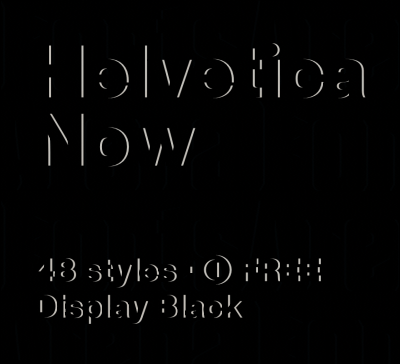

In [49]:
#kernel = np.ones((3,3),np.float32)/25
# kernel = np.float32([[-1,0,1],[0,1,-1],[1,-1,0]])
kernel = np.float32([[0,0,0],[-1,0,1],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Sharpen Kernel
<b> Matrix:</b>

| 0  | 1  | 2  |
|----|----|----|
| 0  | -2 | 0  |
| -2 | 9  | -2 |
| 0  | -2 | 0  |

<b>Logic: </b> When the neighboring pixels are different, this kernel boosts the center pixel. Since the intensity does not need to be changed, the sum of values of kernels should remain 1.

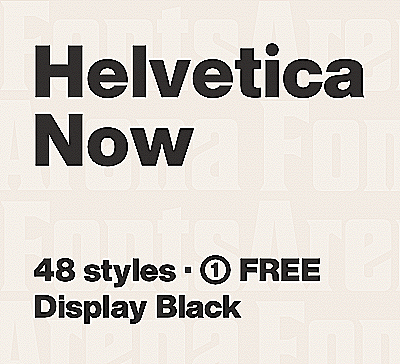

In [42]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-2,0],[-2,9,-2],[0,-2,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Blur Kernel
<b> Matrix:</b>

| 0  | 1  | 2  |
|----|----|----|
| 1/9  | 1/9 |1/9  |
| 1/9 | 1/9  | 1/9 |
| 1/9  | 1/9 | 1/9  |

<b>Logic: </b> Compute each pixel using the  average of surronding pixels. Since the intensity does not need to be changed, the sum of values of kernels should remain 1, hence, division by 9.

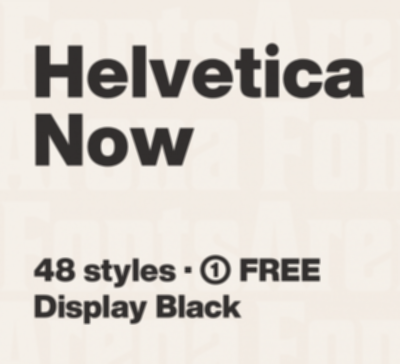

In [24]:
kernel = np.ones((3,3),np.float32)/9

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Identity Kernel
<b> Matrix:</b>

| 0  | 1  | 2  |
|----|----|----|
| 0  | 0 |0  |
| 0 | 1  | 0 |
| 0  | 0 | 0  |

<b>Logic: </b> Compute value of each pixel using the pixel in center, keeps the image unchanged.

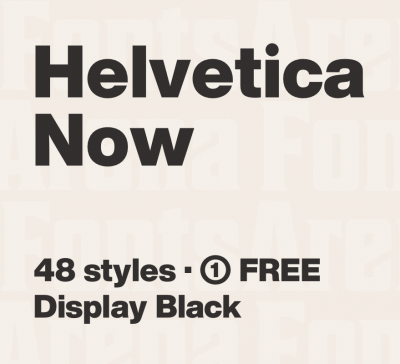

In [33]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)